# Random Forest classifier

Made by Faris D. Qadri | 2021-08-09

Personal and professional use is allowed with permission from author.

[Random Forest method explanation](https://en.wikipedia.org/wiki/Random_forest)

[Source](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

[Code source](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

## Libraries

In [1]:
# Necessary libraries

## Basic libraries
import pandas as pd

## Data
from sklearn import datasets

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train-Test split
from sklearn.model_selection import train_test_split

## Model
from sklearn.ensemble import RandomForestClassifier

## Model evaluation
from sklearn import metrics

## Data

In [2]:
iris = datasets.load_iris()
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Data is in numpy NDarray form

### Making pd.Dataframe version of the data

In [4]:
df = pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

# Output
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Train-Test split

In [5]:
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y = df['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## Model deployment

In [6]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [7]:
# Result of the model
clf.predict([[3, 5, 4, 2]])

array([2])

## Model evaluation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Because all of the feature in this data is all important, we don't need to exclude any feature at all. However, most data out there does have features that are not very important. Therefore you need to also learn how to use the "Feature Importance function" to select which feature is the most important feature, and which features need to be excluded in term of makingthe accuracy of the model better.

## Feature importance

In [8]:
feature_imp = pd.Series(clf.feature_importances_,index = iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.457068
petal width (cm)     0.425127
sepal length (cm)    0.098248
sepal width (cm)     0.019557
dtype: float64

### Feature importance visualization

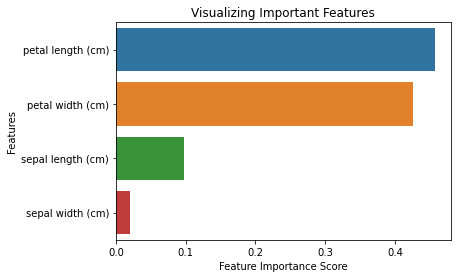

In [9]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

# Output
plt.show()

Here you can decide which feature is the most important feature of the data that we have.